# 似然函数详解

## 定义

在统计学和机器学习中，**似然函数（Likelihood Function）** 是基于已观测到的数据来描述参数合理性的一个函数。与“概率”概念略有不同的是：

- **概率（Probability）**：给定某些参数或模型，描述观测到某个数据（或事件）发生的可能性。
- **似然（Likelihood）**：给定已观测到的数据，评估不同参数（或模型）解释数据的合理程度。

换句话说，似然函数把“数据”视为固定不变的已知量，而把“参数”作为变量，用来衡量不同参数值对数据的解释力。

## 举例说明

假设有一枚硬币，其正面朝上的概率为 $p$：

1. 进行了 10 次抛硬币实验，结果观测到 7 次正面、3 次反面。
2. 对于不同的 $p$ 值，观测到该结果的似然值为：

   $$
   L(p) = P(\text{观测到 7 次正面，3 次反面} \mid p) = \binom{10}{7} p^7 (1 - p)^3.
   $$

3. 这里 $p$ 是可变参数，而 7 次正面和 3 次反面是固定的观测数据。随着 $p$ 的变化，$L(p)$ 的值也会变化。

## 最大似然估计

**最大似然估计（Maximum Likelihood Estimation, MLE）** 利用似然函数来选择使似然值最大的参数。以抛硬币问题为例，最大似然估计的结果是：

$$
\hat{p} = \frac{7}{10} = 0.7.
$$

这表示在观察到 7 次正面、3 次反面的情况下，最合理的正面概率估计为 0.7。

## 关键要点

1. **似然函数 vs. 概率函数**
   - **概率函数**：给定参数，描述数据出现的概率。
   - **似然函数**：给定数据，评估参数解释数据的合理性。

2. **用途**
   - 用于参数估计（如最大似然估计 MLE），寻找最能解释数据的参数值。
   - 用于模型选择或贝叶斯推断中，衡量模型对数据的解释能力。

3. **对数似然**
   - 在实际计算中，经常使用对数似然（Log-Likelihood）将乘积转换为求和，以简化计算和求导。
   - 对数似然的最大化与似然函数的最大化是等价的。

## 总结

似然函数是在已知观测数据的前提下，用来评估不同参数对数据解释能力的函数，是统计建模和机器学习中参数估计、模型比较等过程的重要工具。


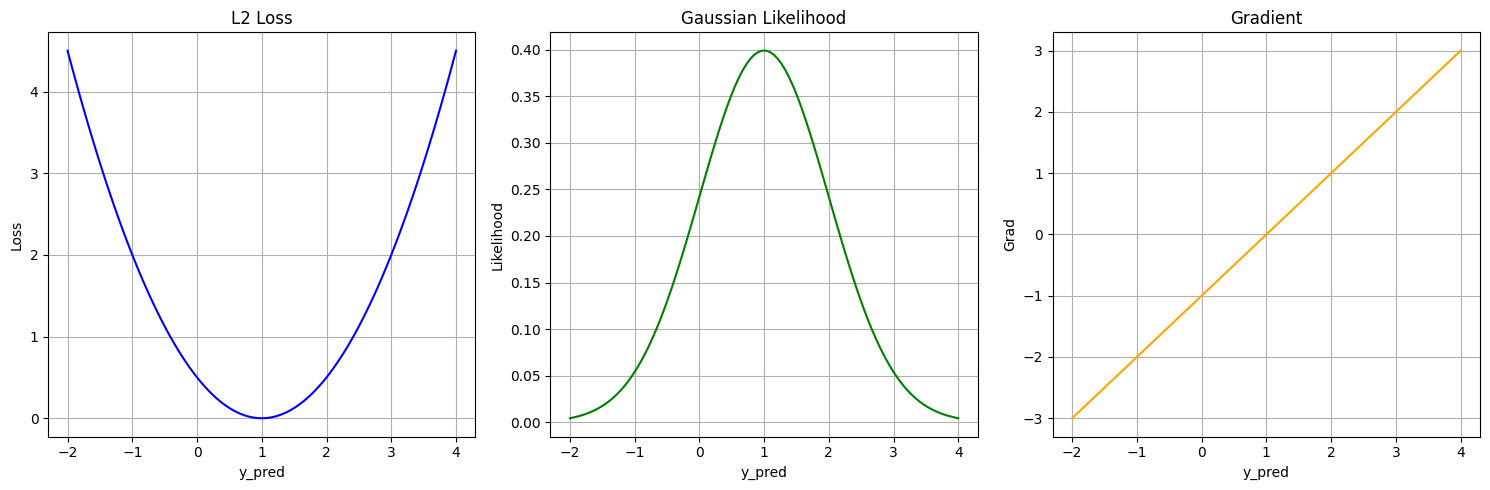

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 真实标签
y_true = 1.0

# 在 -2 到 4 范围内均匀取 100 个点，作为预测值
y_pred = np.linspace(-2, 4, 100)

# 1. 定义 L2 损失
def l2_loss(y, yhat):
    return 0.5 * (y - yhat)**2

# 2. 定义高斯似然 (假设 sigma=1，带归一化常数)
def gaussian_likelihood(y, yhat):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (y - yhat)**2)

# 3. L2 Loss 对预测值的梯度
def grad_l2(y, yhat):
    return (yhat - y)

# 分别计算 L2 损失、似然值和梯度
l2_vals = l2_loss(y_true, y_pred)
like_vals = gaussian_likelihood(y_true, y_pred)
grad_vals = grad_l2(y_true, y_pred)

# 使用子图分别展示
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (1) L2 Loss
axes[0].plot(y_pred, l2_vals, color='blue')
axes[0].set_title('L2 Loss')
axes[0].set_xlabel('y_pred')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# (2) Gaussian Likelihood
axes[1].plot(y_pred, like_vals, color='green')
axes[1].set_title('Gaussian Likelihood')
axes[1].set_xlabel('y_pred')
axes[1].set_ylabel('Likelihood')
axes[1].grid(True)

# (3) Gradient of L2 Loss
axes[2].plot(y_pred, grad_vals, color='orange')
axes[2].set_title('Gradient')
axes[2].set_xlabel('y_pred')
axes[2].set_ylabel('Grad')
axes[2].grid(True)

plt.tight_layout()
plt.show()


在统计建模中，我们通常通过假设误差（或残差）的分布来推导出对应的损失函数：

1. **高斯分布**
   假设误差服从高斯分布，其概率密度函数为
   $$
   p(y \mid \hat{y}) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(y - \hat{y})^2}{2\sigma^2}\right).
   $$
   当我们取对数并忽略与参数无关的常数项时，其负对数似然（Negative Log-Likelihood, NLL）与平方误差
   $$
   \frac{1}{2}(y-\hat{y})^2
   $$
   成正比，这正好对应于 **L2 Loss**。
   换句话说，在误差服从高斯分布的假设下，最大似然估计会引导我们最小化 L2 损失。

2. **拉普拉斯分布**
   假设误差服从拉普拉斯分布，其概率密度函数为
   $$
   p(y \mid \hat{y}) = \frac{1}{2b}\exp\left(-\frac{|y - \hat{y}|}{b}\right).
   $$
   同样地，对数后取负得到的形式与绝对误差
   $$
   |y - \hat{y}|
   $$
   成正比，这对应于 **L1 Loss**。
   因此，当假设误差服从拉普拉斯分布时，最大似然估计会导向最小化 L1 损失。

此外，二者在对异常值的处理上也有所不同：

- **L2 Loss**（高斯假设）对异常值非常敏感，因为平方项会放大较大的误差。
- **L1 Loss**（拉普拉斯假设）对异常值较为鲁棒，因为绝对值函数对异常值的放大效应没有平方那样严重。

**总结：**
选择高斯或拉普拉斯似然（以及对应的 L2 或 L1 损失）取决于你对数据中误差分布的假设以及对异常值敏感性的考虑。


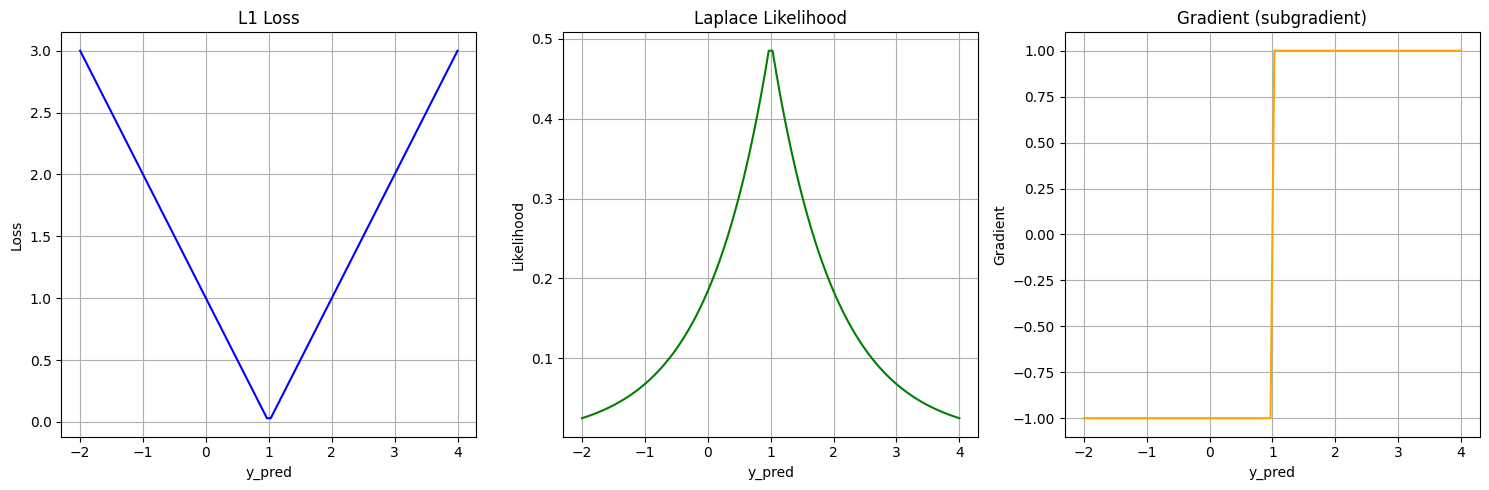

In [4]:


import numpy as np
import matplotlib.pyplot as plt

# 真实标签
y_true = 1.0

# 在 -2 到 4 范围内均匀取 100 个点作为预测值
y_pred = np.linspace(-2, 4, 100)

# 1. 定义 L1 Loss: L1 Loss = |y - y_pred|
def l1_loss(y, yhat):
    return np.abs(y - yhat)

# 2. 定义 Laplace 似然函数（假设尺度参数 b = 1）
# 拉普拉斯分布的概率密度函数为：
#   p(y|yhat) = (1/(2b)) * exp(-|y - yhat|/b)
# 这里令 b=1，则：
#   p(y|yhat) = 1/2 * exp(-|y - yhat|)
def laplace_likelihood(y, yhat):
    return (1.0 / 2) * np.exp(-np.abs(y - yhat))

# 3. 定义 L1 Loss 的梯度（子梯度）
# 对 |y - yhat| 求导，子梯度为 sign(yhat - y)
def grad_l1(y, yhat):
    return np.sign(yhat - y)

# 计算 L1 Loss、Laplace 似然和梯度
l1_vals = l1_loss(y_true, y_pred)
laplace_like_vals = laplace_likelihood(y_true, y_pred)
grad_vals = grad_l1(y_true, y_pred)

# 使用子图分别展示
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (1) L1 Loss
axes[0].plot(y_pred, l1_vals, color='blue')
axes[0].set_title('L1 Loss')
axes[0].set_xlabel('y_pred')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# (2) Laplace Likelihood
axes[1].plot(y_pred, laplace_like_vals, color='green')
axes[1].set_title('Laplace Likelihood')
axes[1].set_xlabel('y_pred')
axes[1].set_ylabel('Likelihood')
axes[1].grid(True)

# (3) Gradient (子梯度)
axes[2].plot(y_pred, grad_vals, color='orange')
axes[2].set_title('Gradient (subgradient)')
axes[2].set_xlabel('y_pred')
axes[2].set_ylabel('Gradient')
axes[2].grid(True)

plt.tight_layout()
plt.show()


另一种损失函数，当误差很大的时候用L1 loss，当误差变小的时候用L2 loss

L1 loss的一个劣势是，有不可导的点


<img src="asset/huber_robust_loss.png" width="600">